In [54]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt

In [7]:
print (os.getcwd())
os.chdir('Downloads')
print (os.getcwd())

C:\Users\Liam
C:\Users\Liam\Downloads


In [8]:
data = pd.read_csv('data.csv')

In [10]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Left Back, with rating of over 60 rating, wage under < 50K

In [16]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [20]:
data.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [37]:
leftbacks = data['Position'] == 'LB'
data[['Name', 'Club', 'Wage']][leftbacks]

,Name,Club,Wage
35,Marcelo,Real Madrid,€285K
49,Jordi Alba,FC Barcelona,€250K
64,Alex Sandro,Juventus,€160K
85,D. Alaba,FC Bayern München,€110K
106,Filipe Luís,Atlético Madrid,€81K
112,Alex Telles,FC Porto,€22K
200,Marcos Alonso,Chelsea,€130K
238,L. Hernández,Atlético Madrid,€53K
241,A. Robertson,Liverpool,€98K
291,A. Kolarov,Roma,€73K


In [42]:
data['Wage'] = data['Wage'].apply(lambda x: int(re.findall('\d+', x)[0] + '000'))

In [45]:
data[['Name', 'Club', 'Wage']]

,Name,Club,Wage
0,L. Messi,FC Barcelona,565000
1,Cristiano Ronaldo,Juventus,405000
2,Neymar Jr,Paris Saint-Germain,290000
3,De Gea,Manchester United,260000
4,K. De Bruyne,Manchester City,355000
5,E. Hazard,Chelsea,340000
6,L. Modrić,Real Madrid,420000
7,L. Suárez,FC Barcelona,455000
8,Sergio Ramos,Real Madrid,380000
9,J. Oblak,Atlético Madrid,94000


In [53]:
over60 = data['Wage'] <= 60000
overall = data['Overall'] >= 75

data[['Name', 'Club', 'Overall', 'Position', 'Wage']][over60 & leftbacks & overall]

,Name,Club,Overall,Position,Wage
112,Alex Telles,FC Porto,84,LB,22000
238,L. Hernández,Atlético Madrid,82,LB,53000
342,Grimaldo,SL Benfica,81,LB,14000
419,Welington Dano,Cruzeiro,80,LB,34000
428,M. Acuña,Sporting CP,80,LB,16000
443,Gayà,Valencia CF,80,LB,33000
445,N. Tagliafico,Ajax,80,LB,20000
473,Ismaily,Shakhtar Donetsk,80,LB,1000
494,D. Blind,Ajax,80,LB,22000
519,Antunes,Getafe CF,80,LB,27000


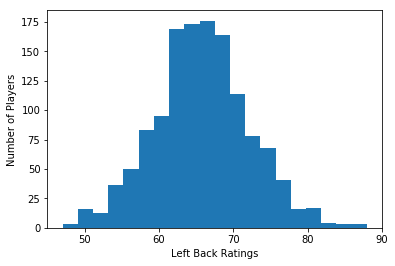

In [57]:
plt.hist(data['Overall'][leftbacks], bins=20)
plt.ylabel('Number of Players')
plt.xlabel('Left Back Ratings')
plt.show()

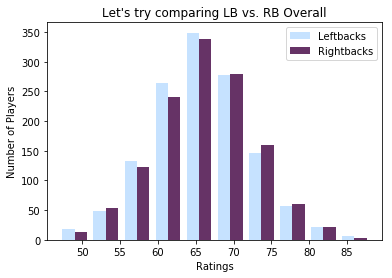

In [59]:
rightbacks = data['Position'] == 'RB'
legend = ['Leftbacks', 'Rightbacks']

plt.hist([data['Overall'][leftbacks], data['Overall'][rightbacks]], color=['#c6e2ff', '#663366'])
plt.xlabel("Ratings")
plt.ylabel("Number of Players")
plt.legend(legend)
#plt.xticks(range(0, 7))
#plt.yticks(range(1, 20))
plt.title('Let\'s try comparing LB vs. RB Overall')
plt.show()